_____________
# 03. Matplotlib & Seaborn
_____________
Matplotlib is a 2D python plotting library with a similar interface to MATLAB's plot engine. The library is fully compatible with NumPy which means that we can -and most of the times will- pass numpy arrays as input arguments to the various plotting functions.

There are many [resources](http://matplotlib.org/resources/index.html) for learning how to use Matplotlib. The following examples demonstrate only some basic plotting functions. When you are looking for a particular feature which you don't know yet how to implement a web search can prove very useful.

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

`plt.plot` plots the values of 2 lists (pairs) which both must have the same amount of values.

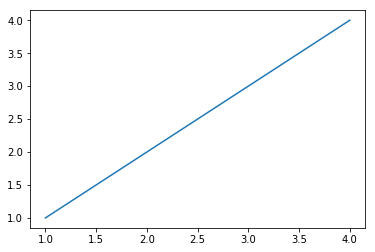

In [2]:
# Try changing the values yourself & rerunning this cell
plt.plot([1,2,3,4], [1,2,3,4])

As you can see it is very easy to generate (simple) plots in Matplotlib. Matplotlib `pyplot` gives us two ways to define plots:
- In Matlab style
- Object-oriented plotting

### Plotting in Matlab style
The plot above was generated using the `plot()` command. Using the `plot()` command follows the same structure as generating plots in Matlab. Following this style we create plots by a succession of plotting functions. Each function changes the figure element. The `plot()` environment takes care of maintaining the reference to the figure and previous changes. The `plot()` functionality also comes with useful defaults for your inputs. For example, we can generate a plot like so:

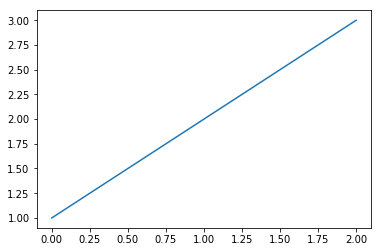

In [3]:
plt.plot([1,2,3])

How did Matplotlib plot this data, given that we only specified one list of elements? 
If you only provide a single list, the `plot()` command assumes that this list are *y-values* and sets the *x-values* to be the `range(0-length(y)`.

###  Plotting in object-oriented fashion
Defining your plots as a *succession* of commands is easy and convenient for simple and standard plots - for more complicated plots, or if you need to have more control about the plotting options, Matplotlib provides a second way to define plots - Object-oriented plotting. Let's see an example for the same plot in object-oriented fashion:

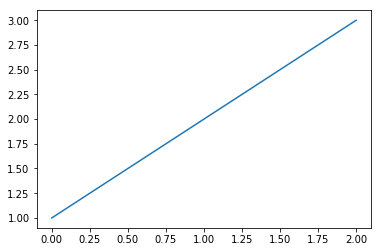

In [4]:
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.plot([1,2,3])

# These are subplot grid parameters encoded as a single integer. 
# For example, "111" (or 1,1,1) means "1x1 grid, first subplot".
# and "234" means "2x3 grid, 4th subplot".

As you can see, the only difference is that we define the figure object and the axes explicitly. However, these explicit references to the figure and axes allow us a finer control of the figure characteristics. In this lab and the following labs and exercises you can use any of the two plotting commands.

<div class="alert alert-info" role="alert">
<h1>Additional Examples: Lineplots</h1>

In [5]:
# THE DOMAIN AND FUNCTIONS:
x = np.linspace(0,1,250)

def f1(x):
    return np.sin(x) + 0.3 * np.random.randn(250)

def f2(x):
    return np.cos(x) + 0.3 * np.random.randn(250)

<div class="alert alert-info" role="alert">
For the functions f1,  f2, and the domain x:
</div>

***Plot `f1()` against `x`.***

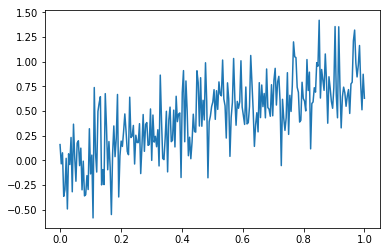

In [6]:
y = f1(x)
plt.plot(x,y)

***Plot both `f1()` and `f2()` in one figure.***

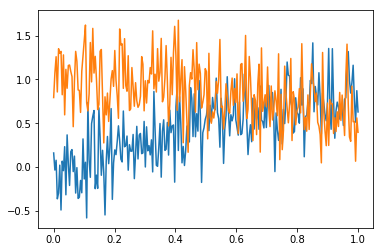

In [7]:
y2 = f2(x)
plt.plot(x, y, x, y2)

***Change the colors of the plots. See pyplot documentation, the third argument for each pair is optional and changes the design.***

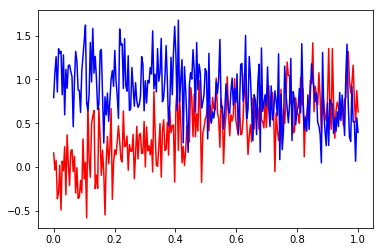

In [8]:
plt.plot(x,y,'r', x,y2,'b')

***Change the style of the lines. Check the `linestyle` parameter***

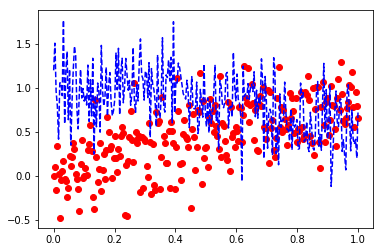

In [9]:
plt.plot(x, f1(x), 'ro', x, f2(x), 'b--')

***Increase figure size, label `f1` as "sine-f1" and `f2` as "cosine-f2", add a legend. Check `plt.legend()`, `label`, and `plt.figure()`.***

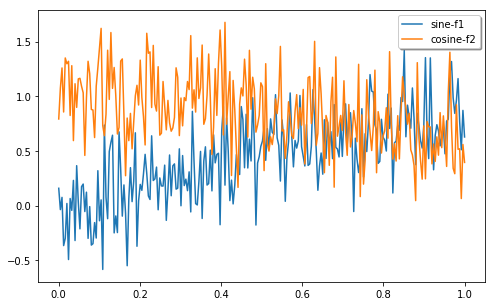

In [10]:
# Instantiates figure with a specified size
plt.figure(figsize=(8,5))

# Create plots with pre-defined labels.
plt.plot(x, y, label='sine-f1')
plt.plot(x, y2, label='cosine-f2')

# Displays legend
plt.legend(loc='upper right', shadow=True)
plt.show()

***Create 4 subplots and plot cosines with different colours, linestyels and linewidths.***

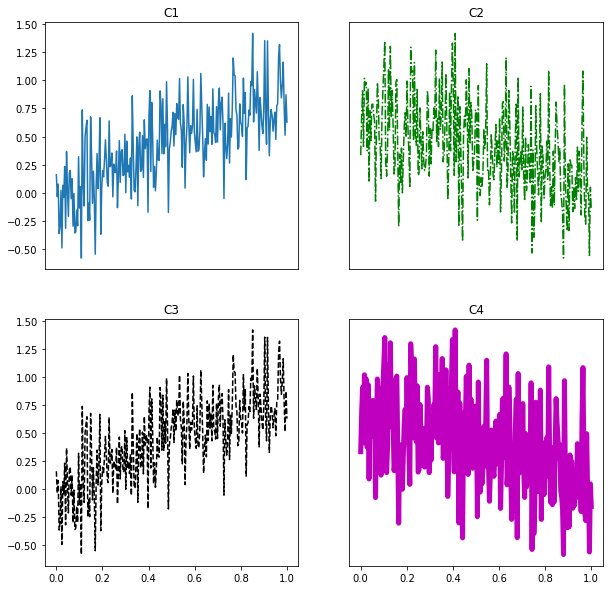

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(x, y)
plt.title('C1')
plt.xticks([]) # Removes xticks
plt.subplot(2,2,2)
plt.plot(x, y2, color='green',  linestyle='-.')
plt.title('C2')
plt.xticks([]) # Removes xticks
plt.yticks([]) # Removes yticks
plt.subplot(2,2,3)
plt.plot(x, y, color='k', linestyle='--')
plt.title('C3')
plt.subplot(2,2,4)
plt.plot(x, y2, color='m', linewidth = 5.)
plt.title('C4')
plt.yticks([]) # Removes yticks
plt.show()

Another way to reference subplots is using the Axes objects. This code acheives the same thing as above but, instead of using the package api functions, it uses the Axes object methods:

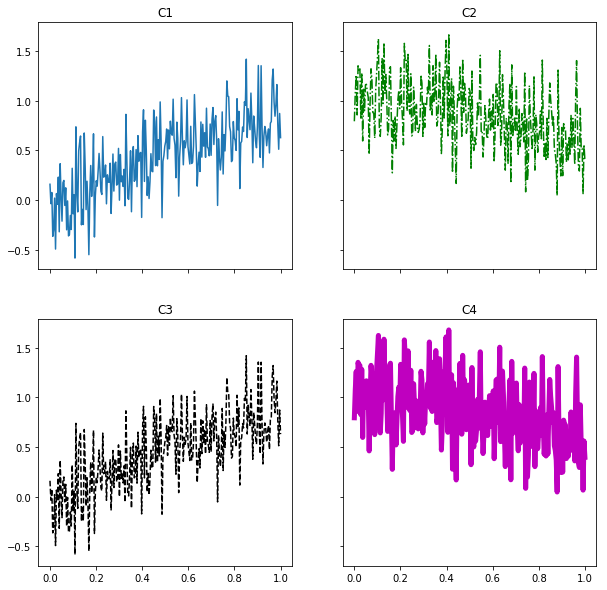

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
# ax is a 2 x 2 numpy array at this point containing the Axes objects
ax = ax.flatten()  # this simply flattens the array such that we can reference by a single index
ax[0].plot(x, y)
ax[0].set_title('C1')
ax[1].plot(x, y2, color='green',  linestyle='-.')
ax[1].set_title('C2')
ax[2].plot(x, y, color='k', linestyle='--')
ax[2].set_title('C3')
ax[3].plot(x, y2, color='m', linewidth = 5.)
ax[3].set_title('C4')
plt.show()

<div class="alert alert-info" role="alert">
<h1>Additional Examples: Histogram</h1>

/home/ondes/anaconda3/envs/fastai/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


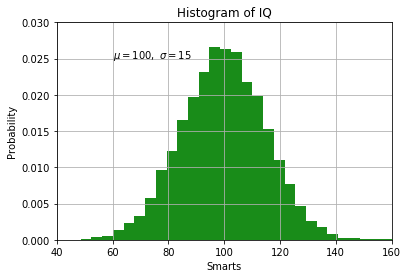

In [13]:
# Plot a histogram and add some text
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) # Generate data from a normal distribution with mean mu and variance sigma

# the histogram of the data
n, bins, patches = plt.hist(x, 30, normed=1, facecolor='g', alpha=0.9)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # Adds some text by using TeX
plt.axis([40, 160, 0, 0.03]) # Sets the axes limits
plt.grid(True) # Enables grid
plt.show()

# ============ Seaborn  ============

[Seaborn](https://seaborn.github.io/index.html) is a visualisation library built on top of matplotlib which offers some aesthetic enhancement and, more importantly, provides some high-level functions for  "exploring and understanding data". Seaborn is also tightly integrated with pandas and provides support for both numpy and pandas data structures.

There's some really useful stuff you can do with seaborn, especially with respect to setting default sizings with respect to the context in which you're producing plots. With one function, seaborn can make plots appropriate for posters, papers, notebooks, or talks. For further information see the [seaborn documentation on aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

**Note**: when you import and use seaborn, it may change the aesthetics of all matplotlib plots you make subsequently. If you only ever want to use matplotlib defaults, you can import seaborn like this: `import seaborn.apionly as sns`. To reset to matplotlib defaults, use: `sns.reset_defaults()`

### Seaborn implemented functions [Optional]
The Seaborn website has many great examples. Below we show a few taken directly from the website. These are just to give you a flavour of the kinds of things that Seaborn can do. You can use it as reference later; by no means should you learn this code by heart! You should definitely not worry if some of the following commands do not make sense just yet.

In [14]:
# Load the example titanic dataset
df = sns.load_dataset("titanic")
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


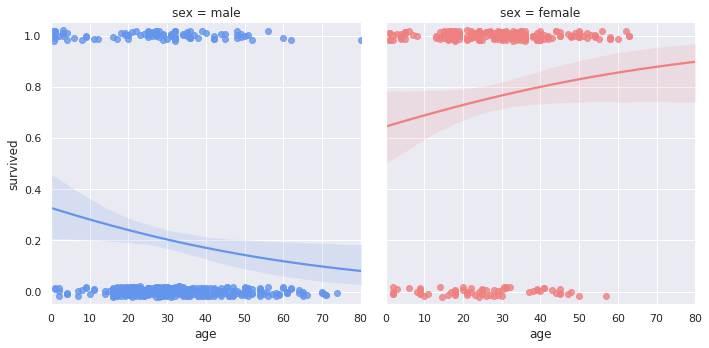

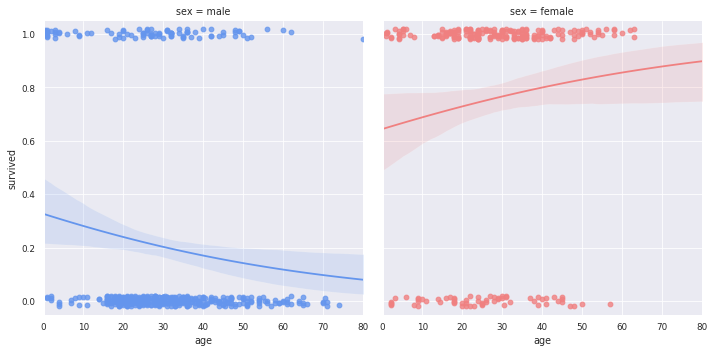

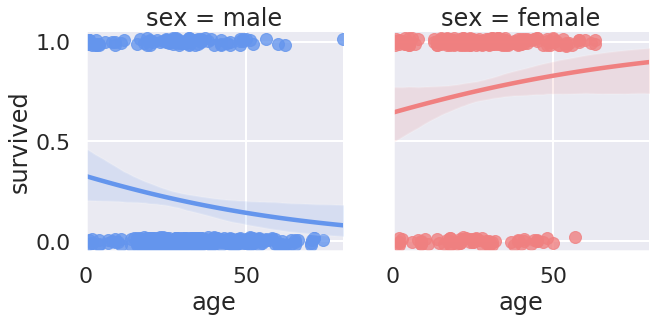

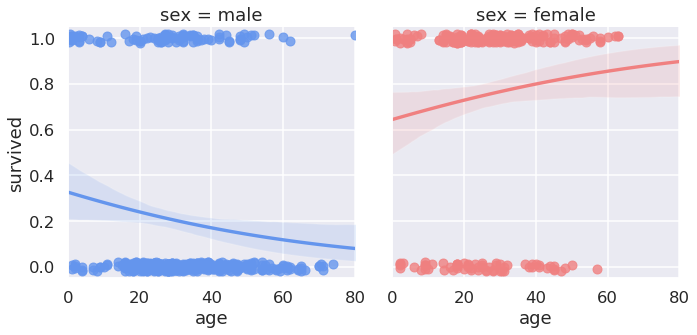

In [15]:
# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette
pal = dict(male="#6495ED", female="#F08080")

with sns.axes_style(style="darkgrid"):
    for context in ['notebook', 'paper', 'poster', 'talk']:
        with sns.plotting_context(context):
            # Show the survival proability as a function of age and sex
            g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
                           palette=pal, y_jitter=.02, logistic=True)
            g.set(xlim=(0, 80), ylim=(-.05, 1.05))
            plt.show()

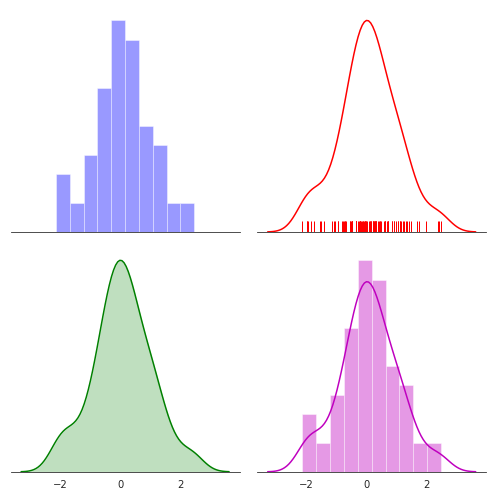

In [16]:
# using a with statement means style defaults are not overridden
with sns.axes_style(style="white", rc=dict(palette="muted", color_codes=True)):
    rs = np.random.RandomState(10)

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    # Generate a random univariate dataset
    d = rs.normal(size=100)

    # Plot a simple histogram with binsize determined automatically
    sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

    # Plot a kernel density estimate and rug plot
    sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

    # Plot a filled kernel density estimate
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

    # Plot a historgram and kernel density estimate
    sns.distplot(d, color="m", ax=axes[1, 1])

    plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.show()

/home/ondes/anaconda3/envs/fastai/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


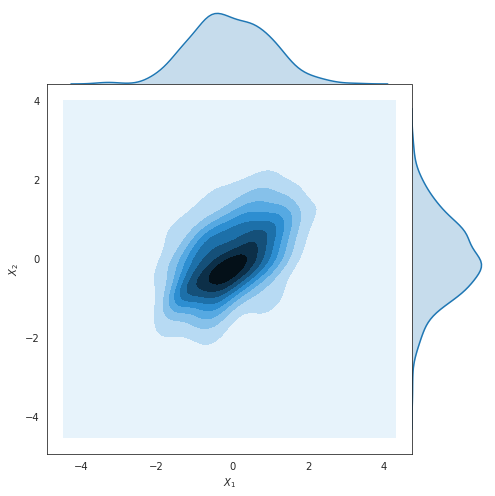

In [17]:
with sns.axes_style(style="white"):

    # Generate a random correlated bivariate dataset
    rs = np.random.RandomState(5)
    mean = [0, 0]
    cov = [(1, .5), (.5, 1)]
    x1, x2 = rs.multivariate_normal(mean, cov, 500).T
    x1 = pd.Series(x1, name="$X_1$")
    x2 = pd.Series(x2, name="$X_2$")

    # Show the joint distribution using kernel density estimation
    g = sns.jointplot(x1, x2, kind="kde", size=7, space=0)
    plt.show()

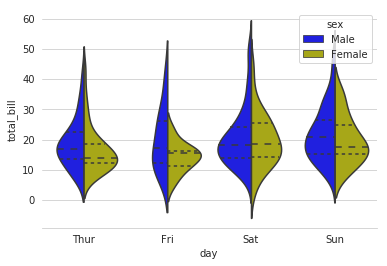

In [18]:
with sns.axes_style(style="whitegrid", rc=dict(palette="pastel", color_codes=True)):
    # Load the example tips dataset
    tips = sns.load_dataset("tips")

    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
                   inner="quart", palette={"Male": "b", "Female": "y"})
    sns.despine(left=True)
    plt.show()

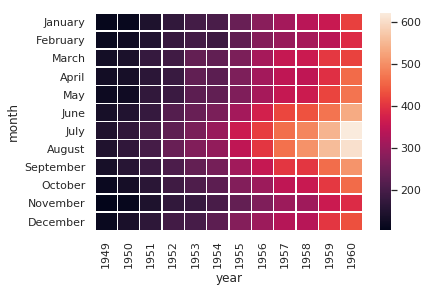

In [19]:
sns.set()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=False, fmt="d", linewidths=.5)
plt.show()

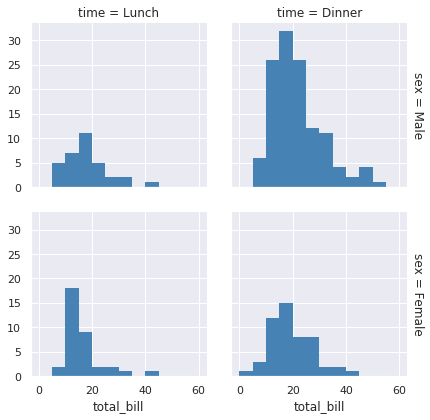

In [20]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)
plt.show()

/home/ondes/anaconda3/envs/fastai/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


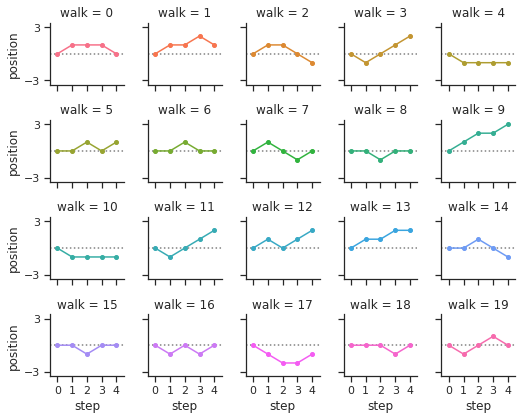

In [21]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.show()

## Matplotlib exercises

#### ========== Question 1 ==========
Initialise an empty figure of size (8,6). Create a scatter plot of the observations in the `credit` dataset for the attributes `Duration` and `Age` (age should be shown on the xaxis). Use black coloured markers. Label the axes accordingly by using red colour for the xaxis and green for the yaxis. Finally, add a title of your choice by using a font size of 20. 

In [4]:
credit

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
0,<0,0.0,ok,furniture,-1.000000e+09,unknown,unemployed,-10000.0,female_single,none,...,car,-293.0,none,own,-1000.0,skilled,-185.0,yes,no,good
1,<0,6.0,critical,television,1.169000e+03,unknown,>=7,4.0,male_single,none,...,real_estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
2,<200,48.0,ok_til_now,television,5.951000e+03,<100,<4,2.0,female,none,...,real_estate,22.0,none,own,1.0,skilled,1.0,no,yes,bad
3,none,12.0,critical,education,2.096000e+03,<100,<7,2.0,male_single,none,...,real_estate,49.0,none,own,1.0,unskilled,2.0,no,yes,good
4,<0,42.0,ok_til_now,furniture,7.882000e+03,<100,<7,2.0,male_single,guarantor,...,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good
5,<0,24.0,past_delays,car_new,4.870000e+03,<100,<4,3.0,male_single,none,...,unknown,53.0,none,free,2.0,skilled,2.0,no,yes,bad
6,none,36.0,ok_til_now,education,9.055000e+03,unknown,<4,2.0,male_single,none,...,unknown,35.0,none,free,1.0,unskilled,2.0,yes,yes,good
7,none,24.0,ok_til_now,furniture,2.835000e+03,<1000,>=7,3.0,male_single,none,...,savings,53.0,none,own,1.0,skilled,1.0,no,yes,good
8,<200,36.0,ok_til_now,car_used,6.948000e+03,<100,<4,2.0,male_single,none,...,car,35.0,none,rent,1.0,management,1.0,yes,yes,good
9,none,12.0,ok_til_now,television,3.059000e+03,>=1000,<7,2.0,male_divorced,none,...,real_estate,61.0,none,own,1.0,unskilled,1.0,no,yes,good


In [10]:
%%timeit
credit.Duration + credit.InstallmentRate

145 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%%timeit
credit.Duration.values + credit.InstallmentRate.values

13.3 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%%timeit
np.array(credit.Duration) + np.array(credit.InstallmentRate)

81.1 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


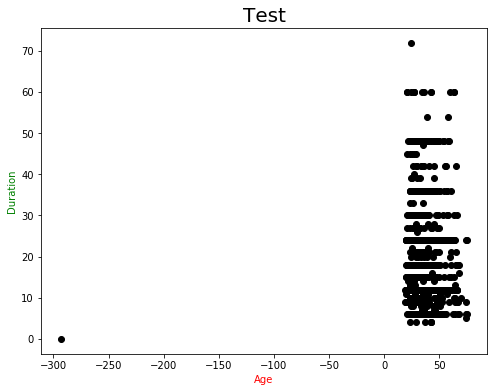

In [3]:
credit = pd.read_csv('data/credit.csv')
credit.head()

age = credit['Age']
duration = credit['Duration']
plt.figure(figsize=(8,6))
plt.scatter(age, duration, color = 'black')
plt.xlabel('Age', color = 'red')
plt.ylabel('Duration', color = 'green')
plt.title('Test',fontsize = 20)
plt.show()

In [26]:
credit

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
0,<0,0.0,ok,furniture,-1.000000e+09,unknown,unemployed,-10000.0,female_single,none,...,car,-293.0,none,own,-1000.0,skilled,-185.0,yes,no,good
1,<0,6.0,critical,television,1.169000e+03,unknown,>=7,4.0,male_single,none,...,real_estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
2,<200,48.0,ok_til_now,television,5.951000e+03,<100,<4,2.0,female,none,...,real_estate,22.0,none,own,1.0,skilled,1.0,no,yes,bad
3,none,12.0,critical,education,2.096000e+03,<100,<7,2.0,male_single,none,...,real_estate,49.0,none,own,1.0,unskilled,2.0,no,yes,good
4,<0,42.0,ok_til_now,furniture,7.882000e+03,<100,<7,2.0,male_single,guarantor,...,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good
5,<0,24.0,past_delays,car_new,4.870000e+03,<100,<4,3.0,male_single,none,...,unknown,53.0,none,free,2.0,skilled,2.0,no,yes,bad
6,none,36.0,ok_til_now,education,9.055000e+03,unknown,<4,2.0,male_single,none,...,unknown,35.0,none,free,1.0,unskilled,2.0,yes,yes,good
7,none,24.0,ok_til_now,furniture,2.835000e+03,<1000,>=7,3.0,male_single,none,...,savings,53.0,none,own,1.0,skilled,1.0,no,yes,good
8,<200,36.0,ok_til_now,car_used,6.948000e+03,<100,<4,2.0,male_single,none,...,car,35.0,none,rent,1.0,management,1.0,yes,yes,good
9,none,12.0,ok_til_now,television,3.059000e+03,>=1000,<7,2.0,male_divorced,none,...,real_estate,61.0,none,own,1.0,unskilled,1.0,no,yes,good


#### ========== Question 2 ==========
You should note above that there is an outlier (i.e. an observation that is very distant to the other observations). Now you think that there must be something wrong with that observation (why?) and as a next step you should remove it from both the age and duration variables and a make a scatter plot of the new data.

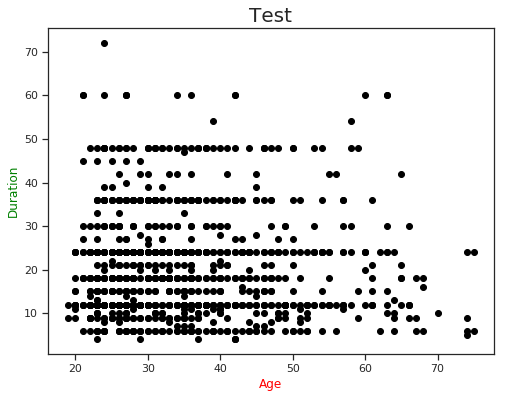

In [25]:
age = credit['Age'][1:]
duration = credit['Duration'][1:]
plt.figure(figsize=(8,6))
plt.scatter(age, duration, color = 'black')
plt.xlabel('Age', color = 'red')
plt.ylabel('Duration', color = 'green')
plt.title('Test',fontsize = 20)
plt.show()